# Machine Learning

## Exercício ENADE 2014

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

In [2]:
enade = pd.read_csv("https://github.com/neylsoncrepalde/introducao_ao_r/raw/master/dados/enade_2014_amostra.csv", sep=";")
enade.head()

,nu_ano,co_grupo,co_ies,co_catad,co_orgac,co_munic_curso,co_uf_curso,co_regiao_curso,nu_idade,tp_sexo,...,qe_i72,qe_i73,qe_i74,qe_i75,qe_i76,qe_i77,qe_i78,qe_i79,qe_i80,qe_i81
0,2014,2001,671,10005,10028,5002704,50,5,36,F,...,a,a,a,b,a,c,a,a,b,a
1,2014,2402,597,93,10028,3170107,31,3,23,F,...,c,a,a,d,c,a,a,a,a,a
2,2014,5902,343,10005,10020,3106200,31,3,27,M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014,4006,521,10005,10028,3530607,35,3,20,M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014,6208,4428,10003,10022,3302403,33,3,24,M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
enade.shape

(10000, 155)

In [4]:
bd = enade[["nt_ger", "nu_idade", "tp_sexo", "qe_i1", "qe_i2",
           "qe_i3", "qe_i4", "qe_i5", "qe_i6", "qe_i7", "qe_i8",
           "qe_i9", "qe_i10"]]

In [5]:
bd.head()

,nt_ger,nu_idade,tp_sexo,qe_i1,qe_i2,qe_i3,qe_i4,qe_i5,qe_i6,qe_i7,qe_i8,qe_i9,qe_i10
0,421.0,36,F,b,c,a,e,b,c,e,a,b,a
1,357.0,23,F,b,a,a,d,d,c,b,c,d,d
2,NaN,27,M,a,c,a,d,f,b,b,c,c,d
3,NaN,20,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,598.0,24,M,a,a,a,d,f,b,c,f,d,e


## Atividade

Utilize seus conhecimentos em *Machine Learning* até agora para encontrar um bom modelo que prediga o desempenho dos alunos no Enade (a nota geral).

Utilize as técnicas que vc aprendeu.

**Cuidado com os Missing Values!!!**

In [7]:
bd = bd.dropna()
bd.shape

(8244, 13)

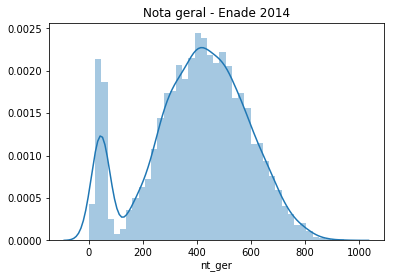

In [10]:
sns.distplot(bd.nt_ger)
plt.title("Nota geral - Enade 2014")
plt.show()

In [11]:
bd.describe()

,nt_ger,nu_idade
count,8244.000000,8244.000000
mean,400.028142,29.700388
std,184.211475,8.456696
min,0.000000,18.000000
25%,292.000000,23.000000
50%,414.000000,27.000000
75%,528.000000,34.000000
max,943.000000,73.000000


In [13]:
bd = pd.get_dummies(bd)
bd.head()

,nt_ger,nu_idade,tp_sexo_F,tp_sexo_M,tp_sexo_N,qe_i1_a,qe_i1_b,qe_i1_c,qe_i1_d,qe_i1_e,...,qe_i9_b,qe_i9_c,qe_i9_d,qe_i9_e,qe_i9_f,qe_i10_a,qe_i10_b,qe_i10_c,qe_i10_d,qe_i10_e
0,421.0,36,1,0,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
1,357.0,23,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,598.0,24,0,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
5,292.0,46,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
7,642.0,24,1,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [14]:
bd = bd.drop(columns="tp_sexo_N")
bd.columns

Index(['nt_ger', 'nu_idade', 'tp_sexo_F', 'tp_sexo_M', 'qe_i1_a', 'qe_i1_b',
       'qe_i1_c', 'qe_i1_d', 'qe_i1_e', 'qe_i2_a', 'qe_i2_b', 'qe_i2_c',
       'qe_i2_d', 'qe_i2_e', 'qe_i3_a', 'qe_i3_b', 'qe_i3_c', 'qe_i4_a',
       'qe_i4_b', 'qe_i4_c', 'qe_i4_d', 'qe_i4_e', 'qe_i4_f', 'qe_i5_a',
       'qe_i5_b', 'qe_i5_c', 'qe_i5_d', 'qe_i5_e', 'qe_i5_f', 'qe_i6_a',
       'qe_i6_b', 'qe_i6_c', 'qe_i6_d', 'qe_i6_e', 'qe_i6_f', 'qe_i7_a',
       'qe_i7_b', 'qe_i7_c', 'qe_i7_d', 'qe_i7_e', 'qe_i7_f', 'qe_i7_g',
       'qe_i7_h', 'qe_i8_a', 'qe_i8_b', 'qe_i8_c', 'qe_i8_d', 'qe_i8_e',
       'qe_i8_f', 'qe_i8_g', 'qe_i9_a', 'qe_i9_b', 'qe_i9_c', 'qe_i9_d',
       'qe_i9_e', 'qe_i9_f', 'qe_i10_a', 'qe_i10_b', 'qe_i10_c', 'qe_i10_d',
       'qe_i10_e'],
      dtype='object')

In [21]:
# Define X e y
y = bd.nt_ger
X = bd.drop(columns="nt_ger")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2,
                                                   random_state=123)

In [18]:
from sklearn.linear_model import RidgeCV

In [19]:
rid = RidgeCV(alphas=np.linspace(0.1, 100, num=1000), fit_intercept=True)

In [22]:
rid.fit(X_train, y_train)

RidgeCV(alphas=array([  0.1,   0.2, ...,  99.9, 100. ]), cv=None,
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

In [23]:
yhat_rid = rid.predict(X_test)
print("MSE for Ridge Regression:")
print(mean_squared_error(y_test, yhat_rid))

MSE for Ridge Regression:
33317.626072203


In [28]:
# Tentando com 10-Fold cross validation
k = 10
kf = KFold(n_splits=k)
kf.get_n_splits(X)

10

In [30]:
mses = []
for train, test in kf.split(X):
    X = np.array(X)
    y = np.array(y)
    rid.fit(X[train], y[train])
    yhat = rid.predict(X[test])
    mses.append(mean_squared_error(y[test], yhat))
    print(mean_squared_error(y[test], yhat))
    
print("Final MSE:")
print(np.mean(mses))

34319.82380114076
31344.87055414003
33683.41119738444
32874.445446789534
33203.19624003633
31311.071603150063
31261.838398635922
34045.00926832168
34234.004817076566
31830.180390408394
Final MSE:
32810.78517170837


In [31]:
# Tentando com LASSO
from sklearn.linear_model import LassoCV

In [33]:
lasso = LassoCV(n_alphas=1000)
lasso.fit(X_train, y_train)
yhat_lasso = lasso.predict(X_test)
print("MSE Lasso:")
print(mean_squared_error(y_test, yhat_lasso))

MSE Lasso:
33205.90107330927


In [34]:
lasso.alpha_

0.4735247568870609

In [35]:
lasso.coef_

array([ -0.91003432,   4.76412945,  -0.        , -12.40125669,
        -0.        ,  10.92550882,  -0.        ,   3.81255471,
         7.55109638,   0.        ,  -6.0050402 ,  -0.        ,
        -0.        ,  18.7093139 ,  -0.        ,  -0.        ,
        -5.47539288,  -2.7996338 ,   0.        ,  -0.        ,
         4.06318656,  17.34750036, -21.98321857,  -0.        ,
         0.        ,   3.56090548,   1.90937366,  -0.        ,
         0.        ,  -4.27530771,  -0.        ,  22.99241133,
        -0.        ,  -0.        ,  10.09563014,   6.34073875,
        15.46629632,   0.        ,  -9.05043201, -17.29803568,
        -0.        ,  -2.81564792, -35.29579852, -11.38960928,
       -10.94278132,  13.84710319,   6.8673601 ,  39.78643417,
        -0.        ,   0.        ,  -1.35526817,   7.19128834,
         0.54474812,  -0.65156034,  -0.        ,  22.4346087 ,
        -1.40968198,  -4.86524191,  15.70803449,   0.        ])

In [36]:
mses = []
for train, test in kf.split(X):
    X = np.array(X)
    y = np.array(y)
    lasso.fit(X[train], y[train])
    yhat = lasso.predict(X[test])
    mses.append(mean_squared_error(y[test], yhat))
    print(mean_squared_error(y[test], yhat))
    
print("Final MSE LASSO:")
print(np.mean(mses))

34349.08190658686
31259.358735905596
33920.89708151294
32938.36911356526
33161.37561812943
31381.467436747018
31347.822277496525
33968.10871137781
34207.28853468397
31690.77548165027
Final MSE LASSO:
32822.45448976557
